


Hi this is Tahiya. This project has used two diffrenet sets of dataset to understand and create insights results to know how much text being generated by AI and the students. I have seen a decent result after F1 Score and consfusion matrix. 

# Workflow

1. Install Package 
2. Import Library 
3. Load & Explore:
    Vizualization
4. Add new dataset:
    Visualization
5. Prepare the data
6. LLM Model


The F1 score is a measure of a test's accuracy and is especially useful when dealing with imbalanced datasets. An F1 score of 0.91 indicates a high level of accuracy, meaning that the test or model is performing well in terms of both precision and recall. To better understand this, let's break down the meaning of an F1 score and the components of a confusion matrix.

Confusion Matrix Components
A confusion matrix for a binary classification problem is structured as follows:


​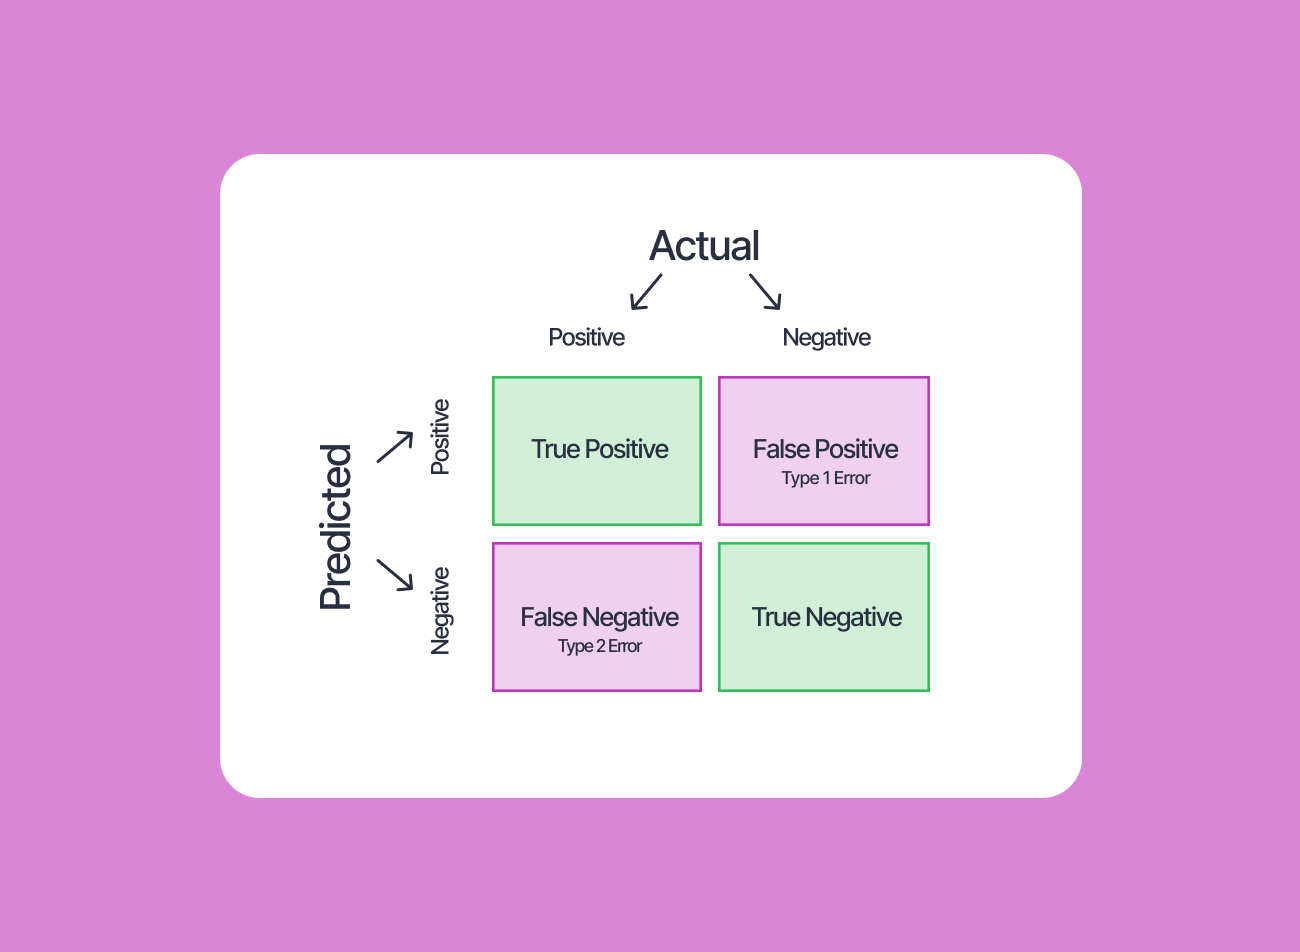
 


* * True Positives (TP): The number of correct positive predictions.
* * False Positives (FP): The number of incorrect positive predictions.
* * False Negatives (FN): The number of incorrect negative predictions.
* * True Negatives (TN): The number of correct negative predictions.
Picture taken from https://www.v7labs.com/blog/confusion-matrix-guide
Ideas taken from https://f-a.nz/dev/develop-your-own-llm-like-chatgpt-with-tensorflow-and-keras/


# Install the keras nlp



In [ ]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

# Importing Libraries

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt


print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

# Load the dataset

In [ ]:
import os 
#Reading the dataset
tahrah_dir = '/kaggle/input/llm-detect-ai-generated-text/'

for dirname, _, filenames in os.walk(tahrah_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Explore the dataset


In [ ]:
df_train_prompts = pd.read_csv(tahrah_dir + "train_prompts.csv")
print(df_train_prompts.info())
df_train_prompts.head()

**Only two prompts are used in this dataset.**

Let's look at the distribution of text/generated in the training set.

In [ ]:
df_train_essays = pd.read_csv(tahrah_dir + "train_essays.csv")
print(df_train_essays.info())
df_train_essays.head()

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values for the 'prompt_id' column
counts = df_train_essays['prompt_id'].value_counts()
labels = counts.index
sizes = counts.values

# Define custom colors (light blue and dark blue)
custom_colors = ['#4CAF50', '#1976D2']  # Light blue and dark blue colors

# Create the donut chart
plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops=dict(width=0.3))
plt.title("Distribution of prompt ID")

# Add a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

# 51.4% are human generated and 48.6% is by AL.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values for the 'generated' column
counts = df_train_essays['generated'].value_counts()
labels = counts.index
sizes = counts.values

# Define custom colors (light blue and dark blue)
custom_colors = ['#4CAF50', '#1976D2']  # Light blue and dark blue colors

# Create the donut chart
f, ax = plt.subplots(figsize=(8, 4))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops=dict(width=0.3))
ax.set_title("Distribution of Generated Text")

# Add a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

# 99.8%% are human generated and 0.2% is by AL.


In [ ]:
df_test_essays = pd.read_csv(tahrah_dir + "test_essays.csv")
print(df_test_essays.info())
df_test_essays.head()

In [ ]:
df_test_essays["text"].apply(lambda x : len(x))

# **The test dataset contains only 3 essays. The length of each essay is very small (12 characters).**

# Add new data 

Dataset created by [DAREK KŁECZEK](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/discussion/455517)

In [ ]:
df_train_essays_ext = pd.read_csv('/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv')

df_train_essays_ext.rename(columns = {"label":"generated"}, inplace=True)

df_train_essays_ext.info()

In [ ]:
df_train_essays_ext.head()

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_essays_ext is already defined and loaded with data
counts = df_train_essays_ext['generated'].value_counts()
labels = counts.index
sizes = counts.values

# Define a custom color palette with black and gray
custom_colors = ['black', 'gray'] + sns.color_palette("husl", len(labels) - 2)

# Create the donut chart
f, ax = plt.subplots(figsize=(8, 4))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops=dict(width=0.3))

# Add a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title("Distribution of Generated Text")
plt.axis('equal')
plt.show()

In [ ]:
df_train_essays


In [ ]:
df_train_essays_final = pd.concat([df_train_essays_ext[["text", "generated"]], df_train_essays[["text", "generated"]]])

df_train_essays_final.info()

# Prepare data # Counting 

In [ ]:
df_train_essays["text_length"] = df_train_essays["text"].apply(lambda x : len(x.split()))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the desired color palette
custom_palette = ["blue", "green"]

# Set the plot style and background color
plt.style.use('seaborn-dark')
plt.rcParams['axes.facecolor'] = 'lightgray'

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Create a swarm plot with custom color palette
sns.swarmplot(data=df_train_essays, x="text_length", ax=ax, palette=custom_palette)

# Set the title and labels
ax.set_title("Distribution of the length per essay - Train dataset")
ax.set_xlabel("Text Length")
ax.set_ylabel("Density")

# Show the plot
plt.show()

In [ ]:
df_train_essays["text_length"].mean() + df_train_essays["text_length"].std()

# Create the model

In [ ]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-4),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
   ]
)
    

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_essays_final["text"],
                                                    df_train_essays_final["generated"],
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
# Fit
classifier.fit(x=X_train, 
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Not Generated","Generated"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))


In [ ]:
y_pred_test = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Test")